In [43]:
#Import Python Packages
#from google.colab import drive
#drive.mount('/content/drive/')

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [0]:
#!cp /content/plot_confusion_matrix.py /content/drive/My\ Drive/CIS508

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.metrics import confusion_matrix,classification_report
from graphviz import Source
from sklearn import tree
import matplotlib.pyplot as plt

In [134]:
#Read training data file
trainfile = r'/gdrive/My Drive/S_Datamining_Python/S_Assignment1/Santander Customer Satisfaction - TRAIN.csv'
trainData = pd.read_csv(trainfile)

#Read test data file
testfile = r'/gdrive/My Drive/S_Datamining_Python/S_Assignment1/Santander Customer Satisfaction - TEST-Without TARGET.csv'
testData = pd.read_csv(testfile)

trainData.head()
#print("=======")
testData.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2.43,6.00,4.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2.55,3.00,2.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,60.0,60.0,60.0,60.0,60.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,57.00,51.45,66.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.87,30.00,21.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [135]:
# show datatypes and data shape
print(trainData.shape)
print(trainData.dtypes)

print(testData.shape)
print(testData.dtypes)

(76020, 371)
ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
TARGET                       int64
Length: 371, dtype: object
(75818, 370)
ID                           int64
var3                         int64
var15                        int64
imp_ent_var16_ult1         float64
imp_op_var39_comer_ult1    float64
                            ...   
saldo_medio_var44_hace2    float64
saldo_medio_var44_hace3    float64
saldo_medio_var44_ult1     float64
saldo_medio_var44_ult3     float64
var38                      float64
Length: 370, dtype: object


In [136]:
# describe data - EDA
print(trainData.describe())

                  ID           var3  ...         var38        TARGET
count   76020.000000   76020.000000  ...  7.602000e+04  76020.000000
mean    75964.050723   -1523.199277  ...  1.172358e+05      0.039569
std     43781.947379   39033.462364  ...  1.826646e+05      0.194945
min         1.000000 -999999.000000  ...  5.163750e+03      0.000000
25%     38104.750000       2.000000  ...  6.787061e+04      0.000000
50%     76043.000000       2.000000  ...  1.064092e+05      0.000000
75%    113748.750000       2.000000  ...  1.187563e+05      0.000000
max    151838.000000     238.000000  ...  2.203474e+07      1.000000

[8 rows x 371 columns]


In [137]:
#Copy Train data excluding target
trainData_Copy = trainData.iloc[:, :-1].copy()
#testData_Copy = testData.iloc[:, :-1].copy()
testData_Copy = testData.copy()

trainData_Copy.head()
#testData_Copy.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,88.89,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.18,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,0.30,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979


In [138]:
#List of Categorical Features
#categoricalFeatures = ['var15','num_var1_0','num_var1','num_var4','num_var4','num_var5_0','num_var5','num_var6_0','num_var6','num_var8_0','num_var8','num_var12_0','num_var12','num_var13_0','num_var13_corto_0','num_var13_corto','num_var13_largo_0','num_var13_largo','num_var13_medio_0','num_var13_medio','num_var13','num_var14_0','num_var14','num_var17_0','num_var17','num_var18_0','num_var18','num_var20_0','num_var20','num_var24_0','num_var24','num_var26_0','num_var26','num_var25_0','num_var25','num_op_var40_hace2','num_op_var40_hace3','num_op_var40_ult1','num_op_var40_ult3','num_op_var41_hace2','num_op_var41_hace3','num_op_var41_ult1','num_op_var41_ult3','num_op_var39_hace2','num_op_var39_hace3','num_op_var39_ult1','num_op_var39_ult3','num_var27_0','num_var28_0','num_var28','num_var27','num_var29_0','num_var29','num_var30_0','num_var30','num_var31_0','num_var31','num_var32_0','num_var32','num_var33_0','num_var33','num_var34_0','num_var34','num_var35','num_var37_med_ult2','num_var37_0','num_var37','num_var39_0','num_var40_0','num_var40','num_var41_0','num_var41','num_var39','num_var42_0','num_var42','num_var44_0','num_var44','num_var46_0','num_var46','var21','num_var2_0_ult1','num_var2_ult1','num_aport_var13_hace3','num_aport_var13_ult1','num_aport_var17_hace3','num_aport_var17_ult1','num_aport_var33_hace3','num_aport_var33_ult1','num_var7_emit_ult1','num_var7_recib_ult1','num_compra_var44_hace3','num_compra_var44_ult1','num_ent_var16_ult1','num_var22_hace2','num_var22_hace3','num_var22_ult1','num_var22_ult3','num_med_var22_ult3','num_med_var45_ult3','num_meses_var5_ult3','num_meses_var8_ult3','num_meses_var12_ult3','num_meses_var13_corto_ult3','num_meses_var13_largo_ult3','num_meses_var13_medio_ult3','num_meses_var17_ult3','num_meses_var29_ult3','num_meses_var33_ult3','num_meses_var39_vig_ult3','num_meses_var44_ult3','num_op_var39_comer_ult1','num_op_var39_comer_ult3','num_op_var40_comer_ult1','num_op_var40_comer_ult3','num_op_var40_efect_ult1','num_op_var40_efect_ult3','num_op_var41_comer_ult1','num_op_var41_comer_ult3','num_op_var41_efect_ult1','num_op_var41_efect_ult3','num_op_var39_efect_ult1','num_op_var39_efect_ult3','num_reemb_var13_hace3','num_reemb_var13_ult1','num_reemb_var17_hace3','num_reemb_var17_ult1','num_reemb_var33_hace3','num_reemb_var33_ult1','num_sal_var16_ult1','num_var43_emit_ult1','num_var43_recib_ult1','num_trasp_var11_ult1','num_trasp_var17_in_hace3','num_trasp_var17_in_ult1','num_trasp_var17_out_hace3','num_trasp_var17_out_ult1','num_trasp_var33_in_hace3','num_trasp_var33_in_ult1','num_trasp_var33_out_hace3','num_trasp_var33_out_ult1','num_venta_var44_hace3','num_venta_var44_ult1','num_var45_hace2','num_var45_hace3','num_var45_ult1','num_var45_ult3']

#Combine Train and test for one Hot Encoding
combined_Data = pd.concat([trainData_Copy, testData_Copy], keys=[0,1])


#Do one Hot encoding for categorical features
#combined_Data = pd.get_dummies(combined_Data,columns=categoricalFeatures)

#Separate Train data and test data
X_Train = combined_Data.xs(0)
X_Test = combined_Data.xs(1)

X_Test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2.43,6.00,4.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2.55,3.00,2.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,60.0,60.0,60.0,60.0,60.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,57.00,51.45,66.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.87,30.00,21.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [170]:
#Select just Target Column
Y_Train = trainData.iloc[:, -1]
#Y_Test = testData.iloc[:, -1]

#Create Decision Tree Classifier
#clf=DecisionTreeClassifier(max_depth=2, criterion='entropy',min_samples_leaf=3) #--4 
#clf=DecisionTreeClassifier(max_depth=25, criterion='entropy',min_samples_leaf=15) #-- 1
#clf=DecisionTreeClassifier(max_depth=100, criterion='entropy',min_samples_leaf=50) #--2
clf=DecisionTreeClassifier(max_depth=30, criterion='entropy',min_samples_leaf=20) # --5
#clf=DecisionTreeClassifier() # --3


#Apply Classifier on Train and Target
clf.fit(X_Train,Y_Train)

#Get Class Prediction as a data frame with header as Prediction
#pred=pd.DataFrame(clf.predict(X_Train),columns=["Prediction"])
pred=pd.DataFrame(clf.predict(X_Train),columns=["Prediction"])

pred.head()

,Prediction
0,0
1,0
2,0
3,0
4,0


In [171]:
#Get Class Prediction probabilities as a data frame 
#Get Prediction Probability for the predicted class as a dataframe
pred_Probability =pd.DataFrame(clf.predict_proba(X_Train))

pred_Probability.head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


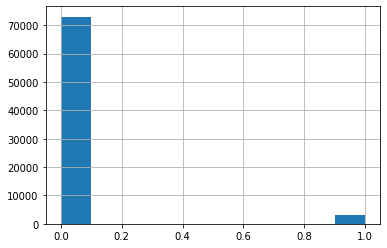

In [73]:
#Histogram Display
import matplotlib.pyplot as plt
H_Train = trainData.iloc[:, -1]
H_Train.hist()

In [0]:
# Box Plot
#H_Train = trainData.iloc[:, -1]
#H_Train.boxplot()

In [0]:
# Scatter plot

x = trainData['num_op_var39_ult1']
y = trainData['TARGET']


plt.scatter(x,y,color = 'r',marker= '*', s=10)
plt.title('num_op_var39_ult1 vs Target')
plt.xlabel('num_op_var39_ult1')
plt.ylabel('TARGET')
plt.show()
#####
x = trainData['imp_op_var39_comer_ult1']
y = trainData['TARGET']


plt.scatter(x,y,color = 'r',marker= '*', s=10)
plt.title('imp_op_var39_comer_ult1 vs Target')
plt.xlabel('imp_op_var39_comer_ult1')
plt.ylabel('TARGET')
plt.show()

#####
x = trainData['ind_var13_medio_0']
y = trainData['TARGET']


plt.scatter(x,y,color = 'r',marker= '*', s=10)
plt.title('ind_var13_medio_0 vs Target')
plt.xlabel('ind_var13_medio_0')
plt.ylabel('TARGET')
plt.show()

######
x = trainData['ind_var18_0']
y = trainData['TARGET']


plt.scatter(x,y,color = 'r',marker= '*', s=10)
plt.title('ind_var18_0 Vs Target')
plt.xlabel('ind_var18_0')
plt.ylabel('TARGET')
plt.show()

######
x = trainData['num_var5_0']
y = trainData['TARGET']


plt.scatter(x,y,color = 'r',marker= '*', s=10)
plt.title('num_var5_0 vs Target')
plt.xlabel('num_var5_0')
plt.ylabel('TARGET')
plt.show()


######
x = trainData['num_op_var40_hace3']
y = trainData['TARGET']


plt.scatter(x,y,color = 'r',marker= '*', s=10)
plt.title('num_op_var40_hace3 Vs Target')
plt.xlabel('num_op_var40_hace3')
plt.ylabel('TARGET')
plt.show()


######
x = trainData['saldo_var12']
y = trainData['TARGET']


plt.scatter(x,y,color = 'r',marker= '*', s=10)
plt.title('saldo_var12 Vs Target')
plt.xlabel('saldo_var12')
plt.ylabel('TARGET')
plt.show()


######
x = trainData['var36']
y = trainData['TARGET']


plt.scatter(x,y,color = 'r',marker= '*', s=10)
plt.title('var36 Vs Target')
plt.xlabel('var36')
plt.ylabel('TARGET')
plt.show()


######
x = trainData['imp_aport_var33_ult1']
y = trainData['TARGET']


plt.scatter(x,y,color = 'r',marker= '*', s=10)
plt.title('imp_aport_var33_ult1 Vs Target')
plt.xlabel('imp_aport_var33_ult1')
plt.ylabel('TARGET')
plt.show()


######
x = trainData['num_var43_emit_ult1']
y = trainData['TARGET']


plt.scatter(x,y,color = 'r',marker= '*', s=10)
plt.title('num_var43_emit_ult1 Vs Target')
plt.xlabel('num_var43_emit_ult1')
plt.ylabel('TARGET')
plt.show()


######
x = trainData['var38']
y = trainData['TARGET']


plt.scatter(x,y,color = 'r',marker= '*', s=10)
plt.title('var38 Vs Target')
plt.xlabel('var38')
plt.ylabel('TARGET')
plt.show()


In [172]:
#Write into a file with actual prediction and corresponding probability
pd.concat([pred,pred_Probability],axis=1).to_csv("/gdrive/My Drive/S_Datamining_Python/results.csv", index = None)

res=pd.read_csv('/gdrive/My Drive/S_Datamining_Python/results.csv')
res.head()

#output = pd.DataFrame({'ID':testData.ID,'Prediction':pred.Prediction})
#output.set_index('ID',inplace=True)
#output.to_csv('/gdrive/My Drive/S_Datamining_Python/S_Assignment1/submission_1.csv',index=False)
#output.to_csv('/gdrive/My Drive/S_Datamining_Python/S_Assignment1/submission_2.csv',index=False)
#output.to_csv('/gdrive/My Drive/S_Datamining_Python/S_Assignment1/submission_1.csv')
#output.to_csv('/gdrive/My Drive/S_Datamining_Python/S_Assignment1/submission_2.csv')
#output.to_csv('/gdrive/My Drive/S_Datamining_Python/S_Assignment1/submission_3.csv')
#output.to_csv('/gdrive/My Drive/S_Datamining_Python/S_Assignment1/submission_4.csv')
#output.to_csv('/gdrive/My Drive/S_Datamining_Python/S_Assignment1/submission_5.csv')

#output.head()

,Prediction,0,1
0,0,1.0,0.0
1,0,1.0,0.0
2,0,1.0,0.0
3,0,1.0,0.0
4,0,1.0,0.0


In [173]:
#Print Classification Report
print(classification_report(Y_Train,pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     73012
           1       0.58      0.05      0.09      3008

    accuracy                           0.96     76020
   macro avg       0.77      0.52      0.54     76020
weighted avg       0.95      0.96      0.94     76020

